In [69]:
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from keras.api.layers import Flatten
from keras.api.utils import to_categorical
import numpy as np
import pandas as pd
import sys
sys.path.append("F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition")
from Datasets.DataLoader.DataLoader import DataLoader, LABELS

In [3]:
DATASET1 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-1"
DATASET2 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-2"
DATASET3 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-3"
REAL_DATA = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\Real Data"

IMAGE_SIZE = 64
SHRINK = 10
INPUT_SHAPE = (64, 64)
CLASSES = 43
THRESHOLD = 100

EPOCHS = 20
N_ESTIMATORS = 4

Loading Files and Dataset ...
Found Categories: ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine', '43-anewfive'] 

X-Train : (3439, 64, 64)
X-Test : (860, 64, 64)
Y-Train : (3439,)
Y-Test : (860,)


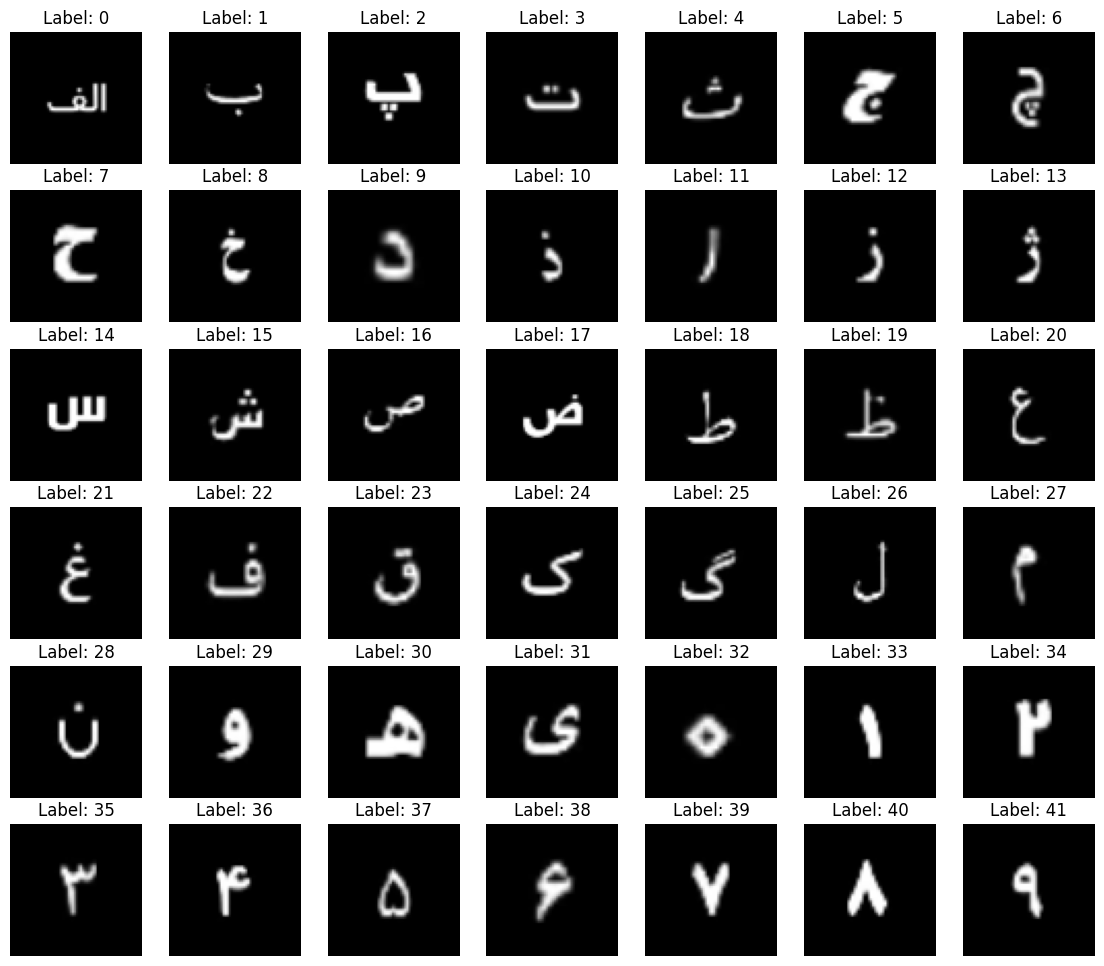

In [4]:
dataloader = DataLoader(path=DATASET1, image_size=IMAGE_SIZE, shrink=SHRINK, contrast=None, zoom=0.5, padding=0, invert=True)
X_train, y_train, X_test, y_test = dataloader.load_data()


print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

X_train_1d = np.array(Flatten()(X_train))
X_test_1d = np.array(Flatten()(X_test))

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 42:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

In [10]:
# SVM Bagging Classifier

# >> Best Params : {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
# >> Best Score : 0.9360287397176805

svm = SVC(C=100, degree=2, gamma='scale', kernel='rbf')
svm_bagging = BaggingClassifier(svm, n_estimators=50, bootstrap=True, n_jobs=-1, random_state=42, verbose=2)

svm_bagging.fit(X_train_1d, y_train)
svm_bagging.score(X_test_1d, y_test)

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:   44.5s remaining:  4.2min
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:   56.6s remaining:   24.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   57.6s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:   26.4s remaining:  2.5min
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:   33.6s remaining:   14.3s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   35.4s finished


0.95

In [63]:
# Decision Tree Bagging Classifier

# >> Best Params : {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
# >> Best Score : 0.8479143393927085

tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2)

tree_bagging = BaggingClassifier(tree, n_estimators=50, bootstrap=True, n_jobs=-1, random_state=42, verbose=2)

tree_bagging.fit(X_train_1d, y_train)
tree_bagging.score(X_test_1d, y_test)

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    7.8s remaining:   44.5s
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:    9.8s remaining:    4.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   10.1s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.0s remaining:    0.6s
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished


0.922093023255814

In [65]:
# KNN Bagging Classifier

# >> Best Params : {'metric': 'euclidean', 'n_neighbors': 3, 'p': 0.5, 'weights': 'distance'}
# >> Best Score : 0.8801995531633999

knn = KNeighborsClassifier(metric='euclidean', n_neighbors=3, p=0.5, weights='distance')

knn_bagging = BaggingClassifier(knn, n_estimators=50, bootstrap=True, random_state=42, verbose=2)

knn_bagging.fit(X_train_1d, y_train)
knn_bagging.score(X_test_1d, y_test)

Building estimator 1 of 50 for this parallel run (total 50)...
Building estimator 2 of 50 for this parallel run (total 50)...
Building estimator 3 of 50 for this parallel run (total 50)...
Building estimator 4 of 50 for this parallel run (total 50)...
Building estimator 5 of 50 for this parallel run (total 50)...
Building estimator 6 of 50 for this parallel run (total 50)...
Building estimator 7 of 50 for this parallel run (total 50)...
Building estimator 8 of 50 for this parallel run (total 50)...
Building estimator 9 of 50 for this parallel run (total 50)...
Building estimator 10 of 50 for this parallel run (total 50)...
Building estimator 11 of 50 for this parallel run (total 50)...
Building estimator 12 of 50 for this parallel run (total 50)...
Building estimator 13 of 50 for this parallel run (total 50)...
Building estimator 14 of 50 for this parallel run (total 50)...
Building estimator 15 of 50 for this parallel run (total 50)...
Building estimator 16 of 50 for this parallel run

0.9093023255813953

In [61]:
class GeneralBaggingClassifier:

    def __init__(self, base_estimator, n_estimators : int = 5, bootstrap : bool = True, epochs : int = 10) -> None:

        self.n_estimators = n_estimators
        self.base_estimator = base_estimator
        self.bootstrap = bootstrap
        self.EPOCHS = epochs
        self.estimators = []


    def bootstrap_data(self, x):

        bootstrapper = KMeans(n_clusters=self.n_estimators)
        bootstrapper.fit(x)

        clusters = bootstrapper.predict(x)
        return clusters
    

    def fit(self, x, y):
        
        if self.bootstrap : 
                all_clusters = []
                
                for e in range(self.EPOCHS):
                        clusters = self.bootstrap_data(x)
                        all_clusters.append(clusters)

                for i in range(self.n_estimators):
                    
                    estimator = self.base_estimator
                    print(f">> Fitting Estimator {i+1} on Cluster {i+1} ...")

                    for e in range(self.EPOCHS):

                        cluster_x = x[all_clusters[e] == i]
                        cluster_y = y[all_clusters[e] == i]

                        print(f"\t- Epoch {e+1} → {cluster_x.shape[0]} Samples")

                        estimator.fit(cluster_x, cluster_y)

                    self.estimators.append(estimator)
        
        else : 
            pass


    def predict(self, x):
        estimators_preds = []

        for estimator in self.estimators:
            pred = estimator.predict(x)
            estimators_preds.append(pred)

        # Voting
        result = np.apply_along_axis(lambda t: np.bincount(t).argmax(), axis=0, arr=estimators_preds)

        return result


    
    def score(self, x, y):
        predictions = self.predict(x)
        return accuracy_score(y, predictions)

In [62]:
my_bagging = GeneralBaggingClassifier(base_estimator=svm, n_estimators=4, bootstrap=True)
my_bagging.fit(X_train_1d, y_train)

>> Fitting Estimator 1 on Cluster 1 ...
	- Epoch 1 → 805 Samples
	- Epoch 2 → 699 Samples
	- Epoch 3 → 702 Samples
	- Epoch 4 → 807 Samples
	- Epoch 5 → 320 Samples
	- Epoch 6 → 757 Samples
	- Epoch 7 → 886 Samples
	- Epoch 8 → 983 Samples
	- Epoch 9 → 760 Samples
	- Epoch 10 → 781 Samples
>> Fitting Estimator 2 on Cluster 2 ...
	- Epoch 1 → 868 Samples
	- Epoch 2 → 913 Samples
	- Epoch 3 → 943 Samples
	- Epoch 4 → 554 Samples
	- Epoch 5 → 1048 Samples
	- Epoch 6 → 698 Samples
	- Epoch 7 → 610 Samples
	- Epoch 8 → 760 Samples
	- Epoch 9 → 983 Samples
	- Epoch 10 → 690 Samples
>> Fitting Estimator 3 on Cluster 3 ...
	- Epoch 1 → 712 Samples
	- Epoch 2 → 1372 Samples
	- Epoch 3 → 601 Samples
	- Epoch 4 → 1060 Samples
	- Epoch 5 → 1220 Samples
	- Epoch 6 → 608 Samples
	- Epoch 7 → 1257 Samples
	- Epoch 8 → 1216 Samples
	- Epoch 9 → 480 Samples
	- Epoch 10 → 882 Samples
>> Fitting Estimator 4 on Cluster 4 ...
	- Epoch 1 → 1054 Samples
	- Epoch 2 → 455 Samples
	- Epoch 3 → 1193 Samples
	- E

In [53]:
print(f"Score : {my_bagging.score(X_test_1d, y_test)}")
preds = my_bagging.predict(X_test_1d)
for i in range(len(X_test_1d)):
    print(f"Pred : {preds[i]}, Target : {y_test[i]}")

Score : 0.28837209302325584
Pred : 16, Target : 16
Pred : 9, Target : 37
Pred : 22, Target : 22
Pred : 2, Target : 35
Pred : 2, Target : 5
Pred : 2, Target : 34
Pred : 11, Target : 10
Pred : 12, Target : 11
Pred : 2, Target : 42
Pred : 15, Target : 25
Pred : 2, Target : 27
Pred : 17, Target : 25
Pred : 0, Target : 23
Pred : 2, Target : 19
Pred : 11, Target : 12
Pred : 2, Target : 21
Pred : 31, Target : 31
Pred : 2, Target : 35
Pred : 2, Target : 39
Pred : 0, Target : 40
Pred : 2, Target : 41
Pred : 12, Target : 13
Pred : 1, Target : 26
Pred : 15, Target : 15
Pred : 3, Target : 6
Pred : 15, Target : 31
Pred : 4, Target : 4
Pred : 31, Target : 31
Pred : 11, Target : 13
Pred : 9, Target : 32
Pred : 2, Target : 5
Pred : 2, Target : 7
Pred : 2, Target : 20
Pred : 17, Target : 25
Pred : 2, Target : 35
Pred : 15, Target : 31
Pred : 3, Target : 3
Pred : 0, Target : 12
Pred : 16, Target : 16
Pred : 9, Target : 37
Pred : 11, Target : 5
Pred : 2, Target : 39
Pred : 24, Target : 14
Pred : 11, Targ

In [66]:
meta_models = {'SVM Bagging' : svm_bagging,
               'DTree Bagging' : tree_bagging,
               'KNN Bagging' : knn_bagging,
               'My Bagging' : my_bagging}

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:   23.8s remaining:  2.3min
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:   28.9s remaining:   12.3s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   29.6s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished


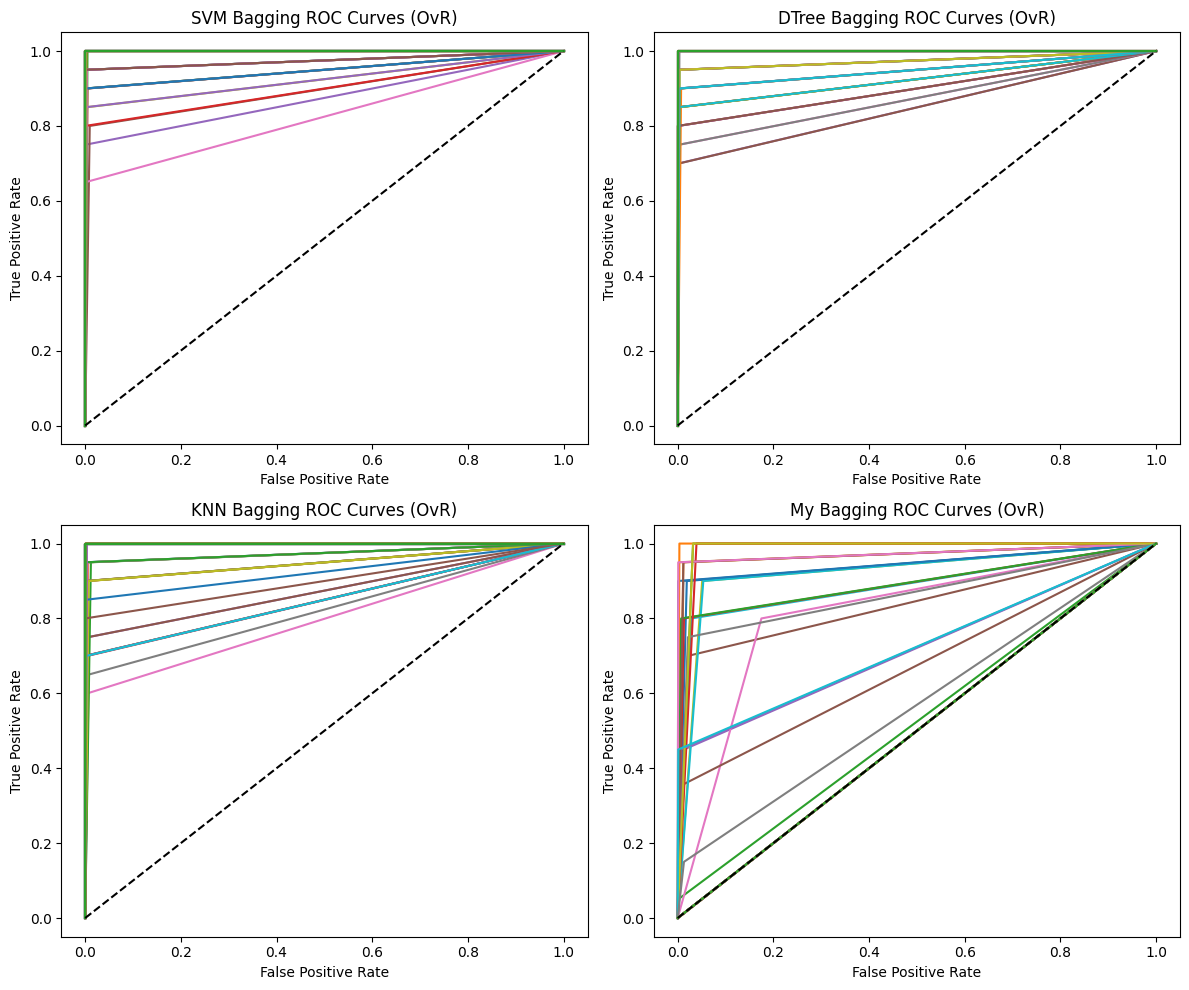

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (name, model) in enumerate(meta_models.items()):
    y_pred = model.predict(X_test_1d)
    y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))
    
    for j in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, j], y_pred_bin[:, j])
        roc_auc = auc(fpr, tpr)
        
        axes[i].plot(fpr, tpr, label=f'Class {j} (AUC = {roc_auc:.2f})')
    
    axes[i].plot([0, 1], [0, 1], 'k--', label='Random Chance')
    axes[i].set_title(f'{name} ROC Curves (OvR)')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')

plt.tight_layout()
plt.show()

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:   24.2s remaining:  2.3min
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:   29.1s remaining:   12.4s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   29.4s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished


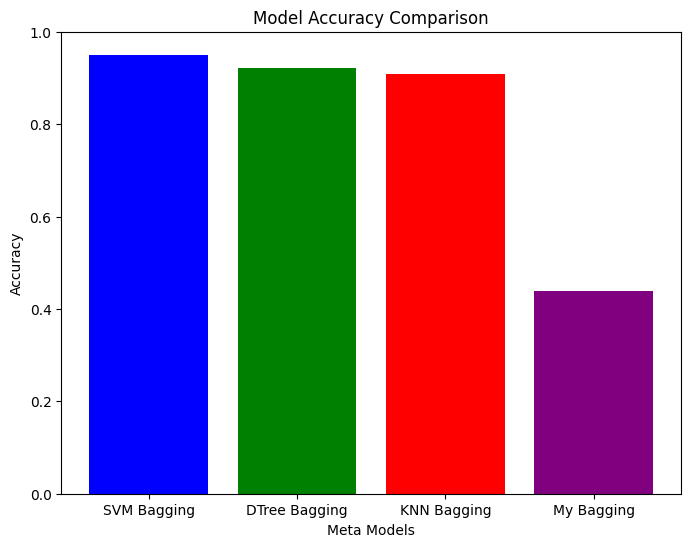

In [76]:
# Calculate and store accuracy for each model
accuracies = {name: accuracy_score(y_test, model.predict(X_test_1d)) for name, model in meta_models.items()}

# Plot accuracies
plt.figure(figsize=(8, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Meta Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis from 0 to 1 for clarity
plt.show()

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:   23.8s remaining:  2.3min
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:   29.4s remaining:   12.6s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   29.7s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished


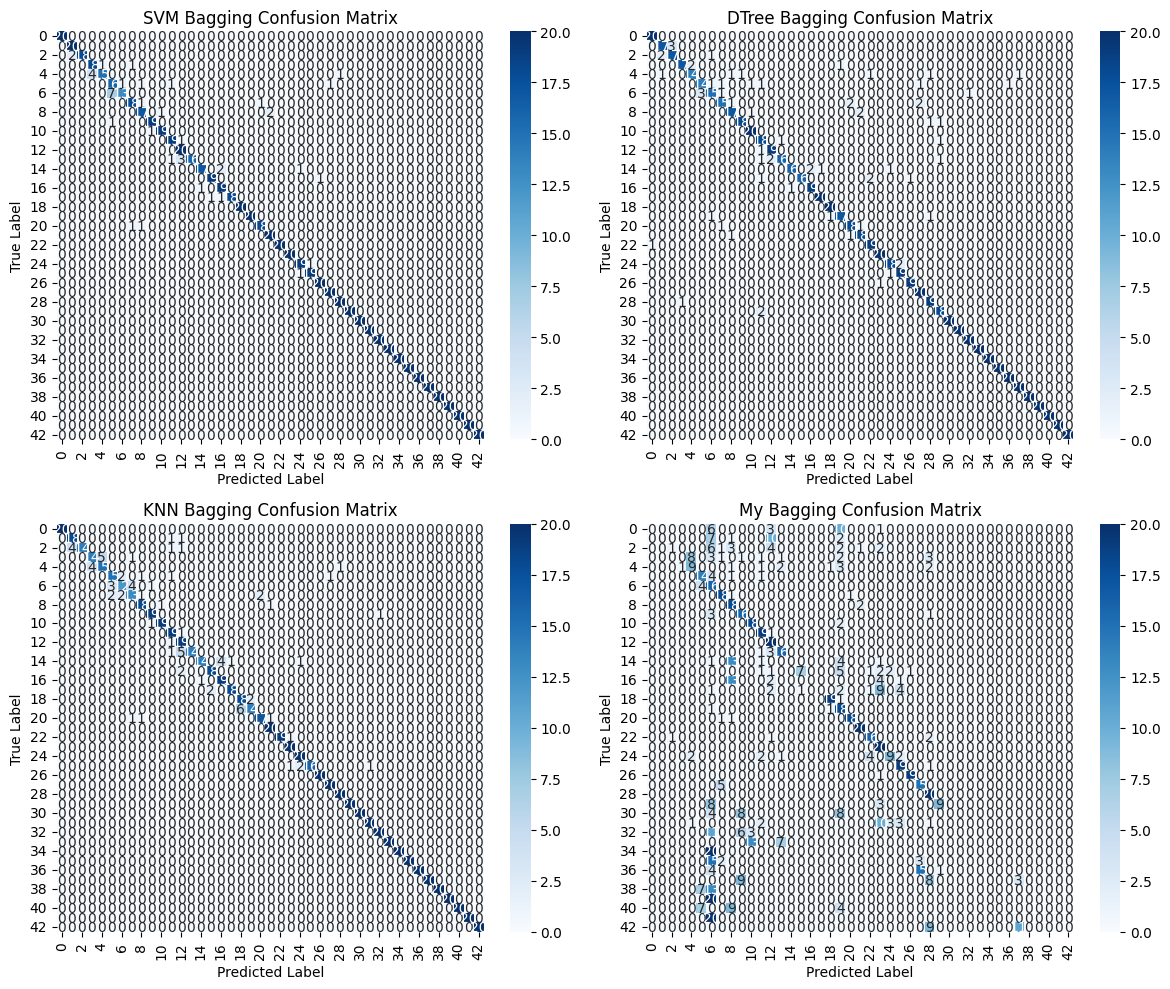

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (name, model) in enumerate(meta_models.items()):
    predictions = model.predict(X_test_1d)
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:   23.5s remaining:  2.2min
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:   29.8s remaining:   12.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:   30.2s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished


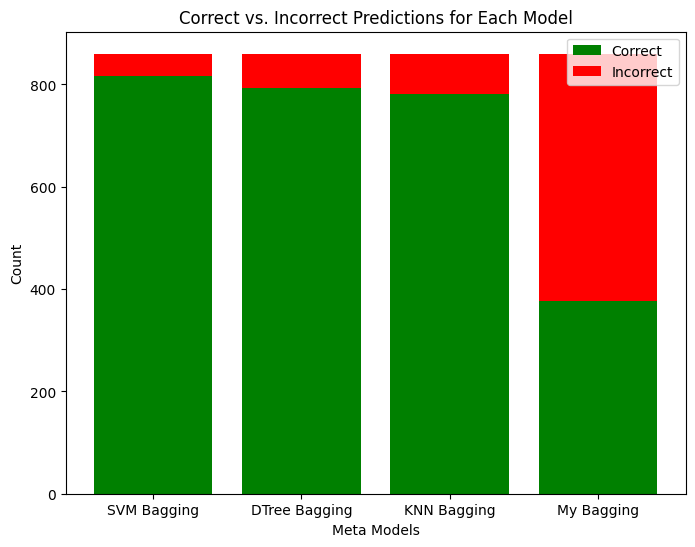

In [ ]:
import numpy as np

correct_counts = []
incorrect_counts = []

for name, model in meta_models.items():
    predictions = model.predict(X_test_1d)
    correct_counts.append((predictions == y_test).sum())
    incorrect_counts.append((predictions != y_test).sum())

labels = meta_models.keys()
x = np.arange(len(labels))

plt.figure(figsize=(8, 6))
plt.bar(x, correct_counts, label='Correct', color='green')
plt.bar(x, incorrect_counts, bottom=correct_counts, label='Incorrect', color='red')

plt.xlabel('Meta Models')
plt.ylabel('Count')
plt.title('Correct vs. Incorrect Predictions for Each Model')
plt.xticks(x, labels)
plt.legend()
plt.show()


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.1s remaining:    1.2s
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    1.0s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.1s remaining:    1.2s
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    1.0s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent wo

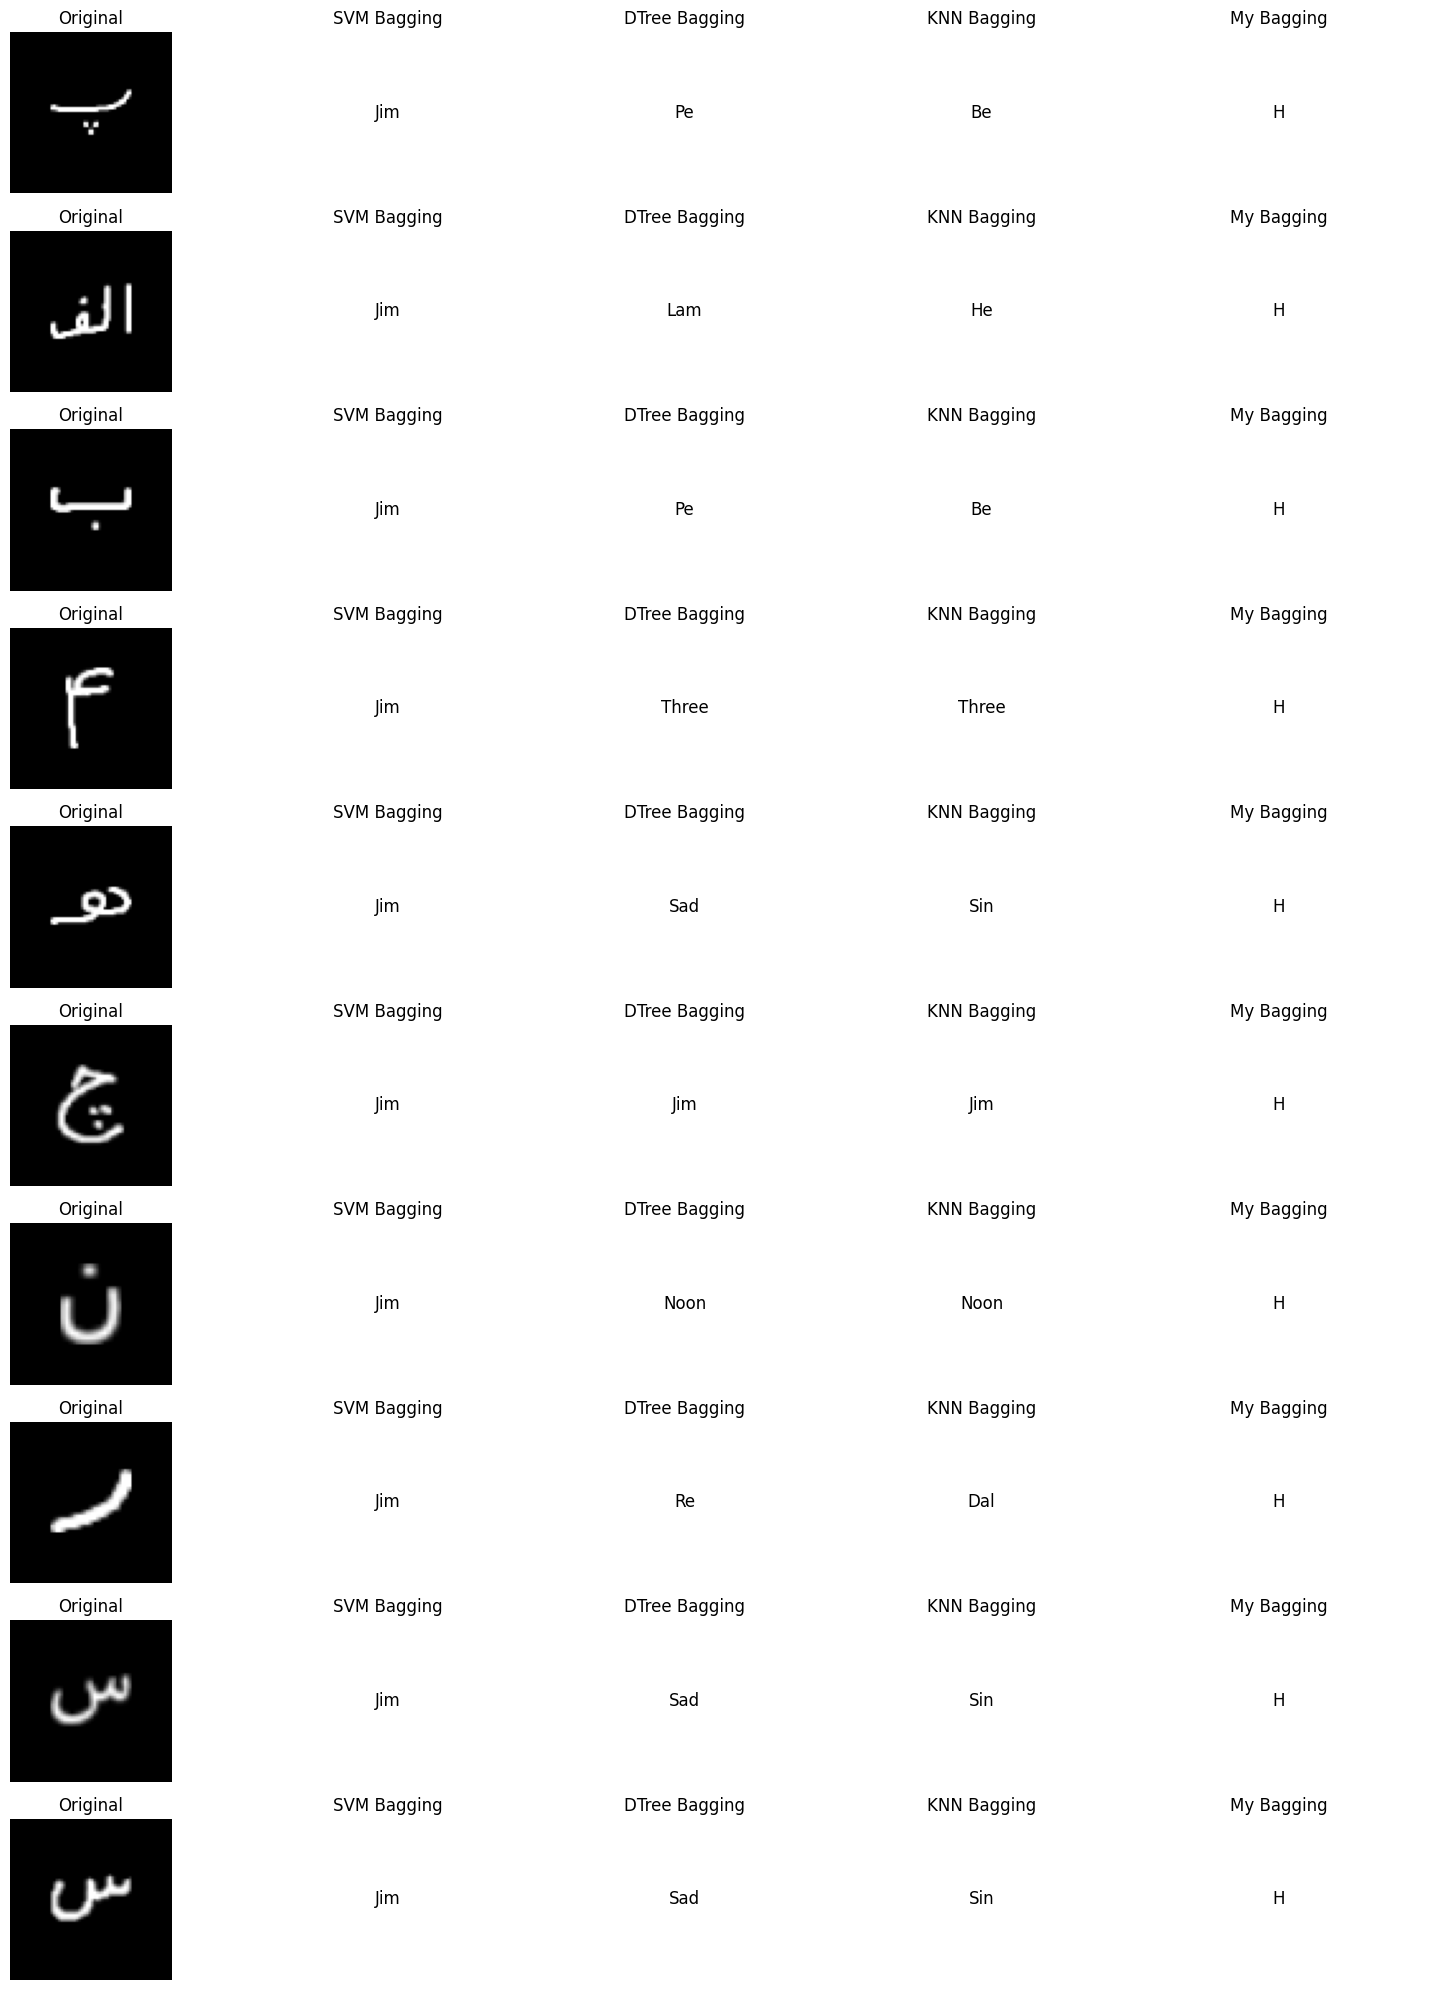

In [ ]:
import os
import cv2 as cv

num_images = len(os.listdir(REAL_DATA))
num_models = len(meta_models)
plt.figure(figsize=(15, num_images * 2))

for i, img_name in enumerate(os.listdir(REAL_DATA)):
    image_path = os.path.join(REAL_DATA, img_name)
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    image = dataloader.centerize(image)  
    image = dataloader.normalize(image)

    plt.subplot(num_images, num_models + 1, i * (num_models + 1) + 1)  
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off') 

    for j, (name, model) in enumerate(meta_models.items()):
        prediction = model.predict(image.reshape(1, -1))  

        plt.subplot(num_images, num_models + 1, i * (num_models + 1) + j + 2)
        plt.text(0.5, 0.5, str(LABELS[prediction[0]]), fontsize=12, ha='center', va='center')
        plt.title(name)
        plt.axis('off') 

plt.tight_layout()
plt.show()